I (We) certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I (we) did not receive 
any external help, coaching or contributions during the production of this work.

- Arpan Shaileshbhai Korat
- Om Hemant Purohit

In [1]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
import pandas as pd
tempdf=pd.concat([pd.DataFrame(trainy),pd.DataFrame(testy)])
tempdf["labels"]=tempdf.values.flatten()

# We can see that we have 7k labels for each number from 0 to 9 included

In [3]:
tempdf.groupby(["labels"]).count()

,0
labels,
0,7000
1,7000
2,7000
3,7000
4,7000
5,7000
6,7000
7,7000
8,7000


In [4]:
tempdf.groupby(["labels"]).count().reset_index()[0]

0    7000
1    7000
2    7000
3    7000
4    7000
5    7000
6    7000
7    7000
8    7000
9    7000
Name: 0, dtype: int64

<BarContainer object of 10 artists>

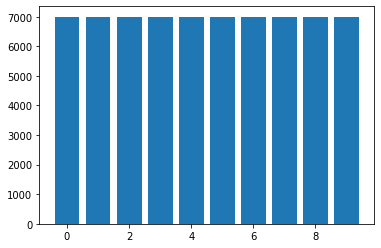

In [5]:
import matplotlib.pyplot as plt
gdf=tempdf.groupby(["labels"]).count().reset_index()
plt.bar(gdf["labels"],gdf[0])

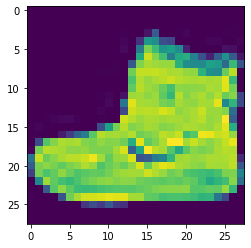

In [6]:
plt.imshow(trainX[0])

0 	T-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot

In [7]:
def plotClothes(x):
    tempList=[]
    for i in range(len(trainy)):
        if len(tempList)>=4:
            break
        if trainy[i]==x:
            tempList.append(trainX[i])
    fig,ax=plt.subplots(2,2,figsize=(8,8))
    for i in range(4):
        ax[i//2][i%2].imshow(tempList[i])
    




# Plot some t shirts

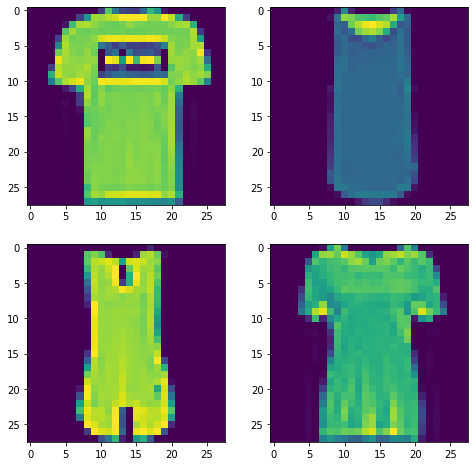

In [8]:
plotClothes(0)


# Plot some shoes


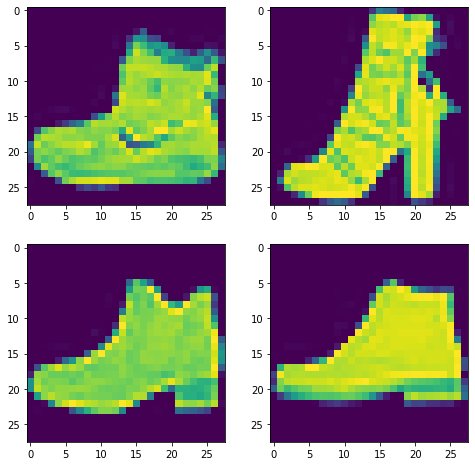

In [9]:
plotClothes(9)

# Plot some sandals

In [ ]:
plotClothes(5)

In [10]:
from keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
trainY.shape

In [11]:
trainX=np.expand_dims(trainX,-1)
testX=np.expand_dims(testX,-1)
trainY=keras.utils.to_categorical(trainy,10)
testY=keras.utils.to_categorical(testy,10)


In [ ]:
trainY

In [ ]:
cnn = keras.Sequential([
    keras.Input(shape=(28,28, 1)),
    keras.layers.Conv2D(filters=64, kernel_size=(5, 3), activation='relu',),
    keras.layers.AveragePooling2D((4, 4)),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(filters=38, kernel_size=(3, 3), activation='relu'),

    # keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer=Adam(lr = 0.00010),
  loss='categorical_crossentropy',
              metrics=['accuracy'])

temp=cnn.fit(trainX,trainY,validation_split=0.2,epochs = 90)

In [ ]:
temp.history.keys()

In [ ]:
cnn.summary()

In [ ]:
import matplotlib.pyplot as plt
basetraining=temp.history["accuracy"]
testing=temp.history["val_accuracy"]
fig,ax=plt.subplots(1,1,figsize=(12,9))
ax.plot(testing,label="testing accuracy")
ax.plot(basetraining,label="training accuracy")
ax.legend()
ax.set_title("Training and testing accuracy plot")
ax.set_xlabel("epochs")

In [ ]:
cnn.evaluate(testX,testY)

In [ ]:
basetrainingLoss=temp.history["loss"]
testing=temp.history["val_loss"]
fig,ax=plt.subplots(1,1,figsize=(12,9))
ax.plot(testing,label="testing loss")
ax.plot(basetraining,label="training loss")
ax.legend()
ax.set_title("Training and testing loss plot")
ax.set_xlabel("epochs")

# EarlyStopping

In [ ]:
from gc import callbacks
cnn.compile(optimizer=Adam(lr = 0.00010),
  loss='categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
cnn.fit(trainX,trainY,validation_split=0.2,epochs = 90,callbacks=[callback])

In [ ]:
cnn.evaluate(testX,testY)

# L1-L2 regularization

In [ ]:
from tensorflow.keras import regularizers
cnn = keras.Sequential([
    keras.Input(shape=(28,28, 1)),
    keras.layers.Conv2D(filters=64, kernel_size=(5, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.4, l2=0.2)),
    keras.layers.AveragePooling2D((4, 4)),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.4, l2=0.2)),
    keras.layers.Conv2D(filters=38, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.4, l2=0.2)),

    # keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')

])

In [ ]:
cnn.compile(optimizer=Adam(lr = 0.00010),
  loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(trainX,trainY,validation_split=0.2,epochs = 90)

# K-FOLD Split will not work here as it works for binary values and we are doing multiclass so it will not be applicable here


# Altering Dropout

In [30]:
dropList=[0.5,0.7,0.9]
testList=[]
trainPlot=[]
testPlot=[]
for d in dropList:
    
    cnn = keras.Sequential([
        keras.Input(shape=(28,28, 1)),
        keras.layers.Conv2D(filters=64, kernel_size=(5, 3), activation='relu',),
        keras.layers.AveragePooling2D((4, 4)),

        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        keras.layers.Conv2D(filters=38, kernel_size=(3, 3), activation='relu'),

        # keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Flatten(),
        keras.layers.Dropout(d),
        # keras.layers.Dense(32, activation='relu'),
        # keras.layers.Dense(16, activation='sigmoid'),
        keras.layers.Dense(10, activation='softmax')
    ])
    cnn.compile(optimizer=Adam(lr = 0.00010),
      loss='categorical_crossentropy',
                  metrics=['accuracy'])
    temp=cnn.fit(trainX,trainY,validation_split=0.2,epochs = 40)
    testList.append(cnn.evaluate(testX,testY))
    testPlot.append(temp.history["accuracy"])
    trainPlot.append(temp.history["val_accuracy"])

Epoch 1/40
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2174 - accuracy: 0.6143 - val_loss: 0.5677 - val_accuracy: 0.8012
Epoch 2/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6921 - accuracy: 0.7522 - val_loss: 0.4726 - val_accuracy: 0.8372
Epoch 3/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5897 - accuracy: 0.7870 - val_loss: 0.4492 - val_accuracy: 0.8380
Epoch 4/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5283 - accuracy: 0.8099 - val_loss: 0.3988 - val_accuracy: 0.8516
Epoch 5/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4818 - accuracy: 0.8271 - val_loss: 0.3838 - val_accuracy: 0.8587
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4453 - accuracy: 0.8406 - val_loss: 0.3556 - val_accuracy: 0.8686
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4163 - accuracy: 0.8504 - val_loss: 0.3542 - val_accuracy:

In [ ]:
testList

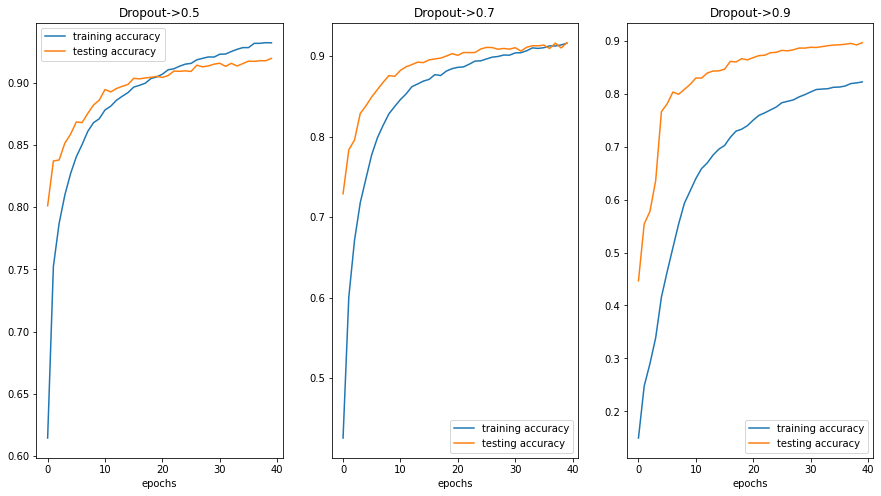

In [31]:
import matplotlib.pyplot as plt
optList=["0.5","0.7","0.9"]
fig,ax=plt.subplots(1,3,figsize=(15,8))
for i in range(3):
    ax[i].plot(testPlot[i],label="training accuracy")
    ax[i].plot(trainPlot[i],label="testing accuracy")
   
    ax[i].legend()
    ax[i].set_title("Dropout->" +optList[i])
    ax[i].set_xlabel("epochs")

# Changing Optimizer

In [32]:
from tensorflow.keras.optimizers import SGD,Nadam
optList=[Adam(lr = 0.00010),Nadam(lr = 0.00010),SGD(lr=0.00010)]
testList=[]
testPlot=[]
trainPlot=[]
for d in optList:
    
    cnn = keras.Sequential([
        keras.Input(shape=(28,28, 1)),
        keras.layers.Conv2D(filters=64, kernel_size=(5, 3), activation='relu',),
        keras.layers.AveragePooling2D((4, 4)),

        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        keras.layers.Conv2D(filters=38, kernel_size=(3, 3), activation='relu'),

        # keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        # keras.layers.Dense(32, activation='relu'),
        # keras.layers.Dense(16, activation='sigmoid'),
        keras.layers.Dense(10, activation='softmax')
    ])
    cnn.compile(optimizer=d,
      loss='categorical_crossentropy',
                  metrics=['accuracy'])
    temp=cnn.fit(trainX,trainY,validation_split=0.2,epochs = 40)
    testPlot.append(temp.history["accuracy"])
    trainPlot.append(temp.history["val_accuracy"])
    testList.append(cnn.evaluate(testX,testY))

Epoch 1/40
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1107 - accuracy: 0.6448 - val_loss: 0.5319 - val_accuracy: 0.8091
Epoch 2/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6502 - accuracy: 0.7733 - val_loss: 0.4481 - val_accuracy: 0.8455
Epoch 3/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5397 - accuracy: 0.8083 - val_loss: 0.4443 - val_accuracy: 0.8465
Epoch 4/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4783 - accuracy: 0.8297 - val_loss: 0.3730 - val_accuracy: 0.8687
Epoch 5/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4383 - accuracy: 0.8455 - val_loss: 0.3524 - val_accuracy: 0.8741
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4058 - accuracy: 0.8567 - val_loss: 0.3289 - val_accuracy: 0.8795
Epoch 7/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3838 - accuracy: 0.8632 - val_loss: 0.3212 - val_accuracy:

In [ ]:
testList

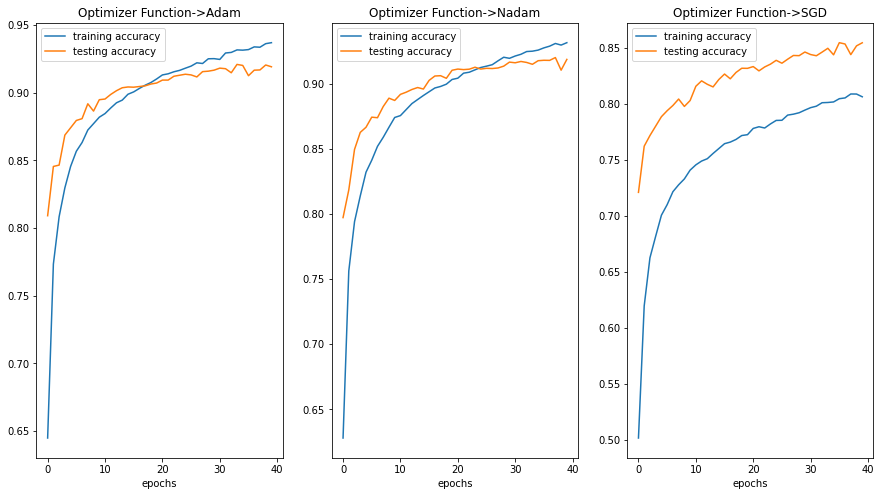

In [33]:
import matplotlib.pyplot as plt
optList=["Adam","Nadam","SGD"]
fig,ax=plt.subplots(1,3,figsize=(15,8))
for i in range(3):
    ax[i].plot(testPlot[i],label="training accuracy")
    ax[i].plot(trainPlot[i],label="testing accuracy")
   
    ax[i].legend()
    ax[i].set_title("Optimizer Function->" +optList[i])
    ax[i].set_xlabel("epochs")

# Changing Activation Functions

In [34]:
from tensorflow.keras.optimizers import SGD,Nadam
optList=['relu','selu','tanh']
testList=[]
testPlot=[]
trainPlot=[]
for d in optList:
    
    cnn = keras.Sequential([
        keras.Input(shape=(28,28, 1)),
        keras.layers.Conv2D(filters=64, kernel_size=(5, 3), activation=d,),
        keras.layers.AveragePooling2D((4, 4)),

        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=d),
        keras.layers.Conv2D(filters=38, kernel_size=(3, 3), activation=d),

        # keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        # keras.layers.Dense(32, activation='relu'),
        # keras.layers.Dense(16, activation='sigmoid'),
        keras.layers.Dense(10, activation='softmax')
    ])
    cnn.compile(optimizer=Adam(lr = 0.00010),
      loss='categorical_crossentropy',
                  metrics=['accuracy'])
    temp=cnn.fit(trainX,trainY,validation_split=0.2,epochs = 40)
    testList.append(cnn.evaluate(testX,testY))
    testPlot.append(temp.history["accuracy"])
    trainPlot.append(temp.history["val_accuracy"])
    

Epoch 1/40
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1372 - accuracy: 0.6416 - val_loss: 0.5797 - val_accuracy: 0.8020
Epoch 2/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6824 - accuracy: 0.7571 - val_loss: 0.5019 - val_accuracy: 0.8204
Epoch 3/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5724 - accuracy: 0.7967 - val_loss: 0.4146 - val_accuracy: 0.8489
Epoch 4/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5185 - accuracy: 0.8164 - val_loss: 0.3966 - val_accuracy: 0.8573
Epoch 5/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4692 - accuracy: 0.8325 - val_loss: 0.3647 - val_accuracy: 0.8652
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4301 - accuracy: 0.8477 - val_loss: 0.3574 - val_accuracy: 0.8724
Epoch 7/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4039 - accuracy: 0.8581 - val_loss: 0.3288 - val_accuracy:

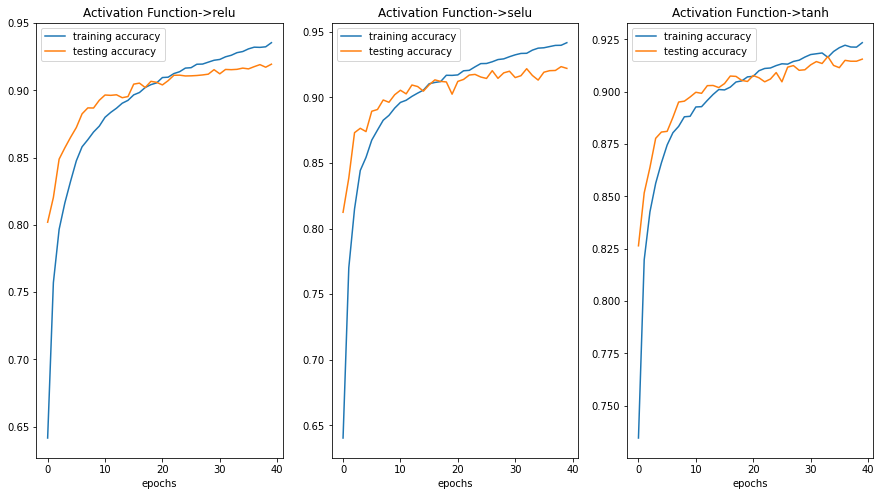

In [37]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(15,8))
for i in range(3):
    ax[i].plot(testPlot[i],label="training accuracy")
    ax[i].plot(trainPlot[i],label="testing accuracy")
   
    ax[i].legend()
    ax[i].set_title("Activation Function->" +optList[i])
    ax[i].set_xlabel("epochs")
    

In [27]:
testList

[[0.2617040276527405, 0.9143999814987183],
 [0.26052218675613403, 0.911300003528595],
 [0.25622567534446716, 0.9067000150680542]]

# FINAL MODEL


In [38]:
cnn = keras.Sequential([
    keras.Input(shape=(28,28, 1)),
    keras.layers.Conv2D(filters=64, kernel_size=(5, 3), activation='relu',),
    keras.layers.AveragePooling2D((4, 4)),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='selu'),
    keras.layers.Conv2D(filters=38, kernel_size=(3, 3), activation='relu'),

    # keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
cnn.compile(optimizer=Adam(lr = 0.00010),
  loss='categorical_crossentropy',
              metrics=['accuracy'])

temp=cnn.fit(trainX,trainY,validation_split=0.2,epochs = 120)

Epoch 1/120
1500/1500 [==============================] - 7s 4ms/step - loss: 1.2387 - accuracy: 0.6118 - val_loss: 0.5423 - val_accuracy: 0.8043
Epoch 2/120
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6828 - accuracy: 0.7567 - val_loss: 0.4792 - val_accuracy: 0.8223
Epoch 3/120
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5678 - accuracy: 0.7959 - val_loss: 0.4164 - val_accuracy: 0.8442
Epoch 4/120
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5023 - accuracy: 0.8188 - val_loss: 0.3853 - val_accuracy: 0.8561
Epoch 5/120
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4575 - accuracy: 0.8333 - val_loss: 0.3627 - val_accuracy: 0.8649
Epoch 6/120
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4236 - accuracy: 0.8476 - val_loss: 0.3389 - val_accuracy: 0.8728
Epoch 7/120
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3983 - accuracy: 0.8579 - val_loss: 0.3203 - val_ac

In [41]:
cnn.evaluate(testX,testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.9195


[0.3468552231788635, 0.9194999933242798]

In [51]:
cnn2 = keras.Sequential([
    keras.Input(shape=(28,28, 1)),
    keras.layers.Conv2D(filters=64, kernel_size=(5, 3), activation='relu',),
    keras.layers.AveragePooling2D((4, 4)),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='selu'),
    keras.layers.Conv2D(filters=38, kernel_size=(3, 3), activation='relu'),

    # keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    # keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])


In [45]:
tf.random.set_seed(36) # Has an effect

In [52]:
cnn2.compile(optimizer=Adam(lr = 0.00010),
  loss='categorical_crossentropy',
              metrics=['accuracy'])

temp=cnn2.fit(trainX,trainY,validation_split=0.2,epochs = 2)

Epoch 1/2
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2496 - accuracy: 0.5818 - val_loss: 0.6204 - val_accuracy: 0.7492
Epoch 2/2
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7306 - accuracy: 0.7324 - val_loss: 0.4946 - val_accuracy: 0.8174
